In [18]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from pillow_heif import register_heif_opener, register_avif_opener
register_avif_opener(thumbnails=False)
register_heif_opener(thumbnails=False)

In [35]:
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

df_list = []
for compression in ('jpeg', 'heif', 'avif'):
    for quality in range(10, 101, 5):
        pnsr_1, pnsr_2 = results[compression]['quality'][quality]
        size_1, size_2 = results[compression]['size'][quality]
        for pnsr, size, img in zip(
            (pnsr_1, pnsr_2),
            (size_1, size_2),
            ('smaller', 'bigger'),
            strict=True
        ):
            df_list.append(
                {
                    'compression': compression,
                    'quality': quality,
                    'pnsr': pnsr,
                    'size': size / 1024,
                    'img': img,
                    'pts': pnsr / size
                }
            )

<Axes: xlabel='quality', ylabel='pts'>

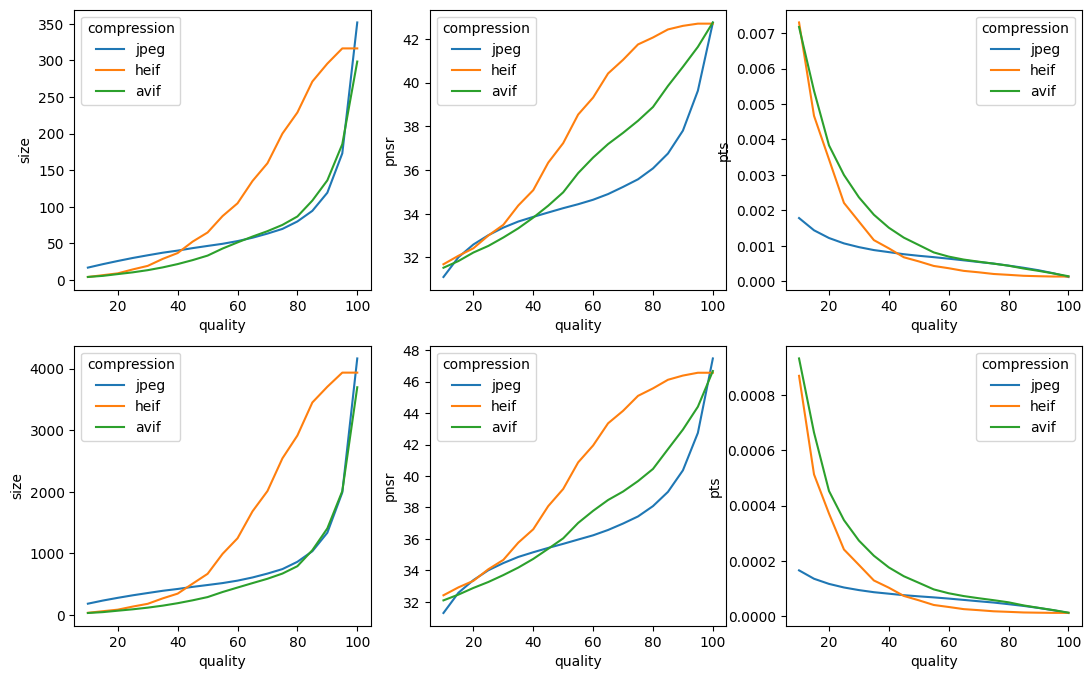

In [36]:
df = pd.DataFrame(df_list)
plt.figure(figsize=(13, 8))
plt.subplot(2, 3, 1)
sns.lineplot(df[df.img == 'smaller'], x='quality', y='size', hue='compression')
plt.subplot(2, 3, 2)
sns.lineplot(df[df.img == 'smaller'], x='quality', y='pnsr', hue='compression')
plt.subplot(2, 3, 3)
sns.lineplot(df[df.img == 'smaller'], x='quality', y='pts', hue='compression')
plt.subplot(2, 3, 4)
sns.lineplot(df[df.img == 'bigger'], x='quality', y='size', hue='compression')
plt.subplot(2, 3, 5)
sns.lineplot(df[df.img == 'bigger'], x='quality', y='pnsr', hue='compression')
plt.subplot(2, 3, 6)
sns.lineplot(df[df.img == 'bigger'], x='quality', y='pts', hue='compression')

In [20]:
img = Image.open(r'D:\Windows\Pulpit\Zdjęcia\zdięcia z lumixa\P1000297.JPG').convert('RGB')
img.save('test.avif', compression='avif', quality=45)#, exif=img.info['exif'])